In [2]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
####import seaborn
%matplotlib inline

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


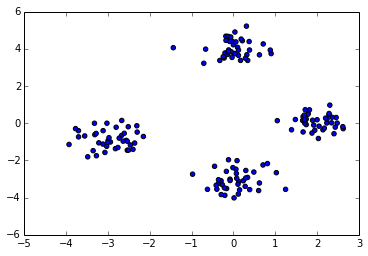

In [3]:
### generate sample
mean1 = np.array([0,4])
mean2 = np.array([-3,-1])
mean3 = np.array([2,0])
mean4 = np.array([0,-3])
conv = np.array([[0.2,0.0],[0.0,0.2]])

x1 = np.random.multivariate_normal(mean1,conv,(40))
x2 = np.random.multivariate_normal(mean2,conv,(40))
x3 = np.random.multivariate_normal(mean3,conv,(40))
x5 = np.random.multivariate_normal(mean4,conv,(40))

x4 =  np.concatenate([x1,x2,x3,x5],0)
x4 = shuffle(x4)
plt.scatter(x4[:,0],x4[:,1])


In [4]:
def alec(x,alpha,d=0.0):
    xxx = [0]
    n = sum(x)
    n_k = 0
    for i in range(len(x)):
        n_k = n_k + x[i]
        xxx.append((n_k*1.0-d*(i+1))/(n+alpha)*1.0)
    xxx.append(1)
    return xxx

def retru_c(c_first):
    set_c_first = set(c_first)
    dic ={}
    for iii in range(len(set_c_first)):
        dic[list(set_c_first)[iii]]=iii

    colorlist =[]
    for i in range(len(x4)):
        colorlist.append(dic[c_first[i]])
    return colorlist

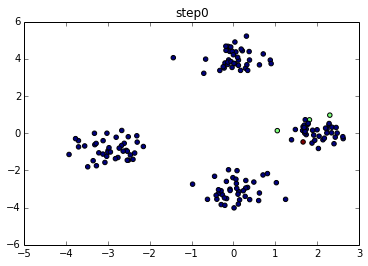

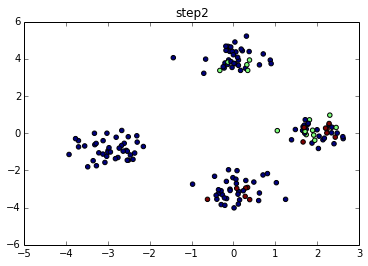

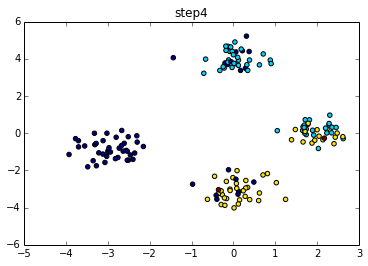

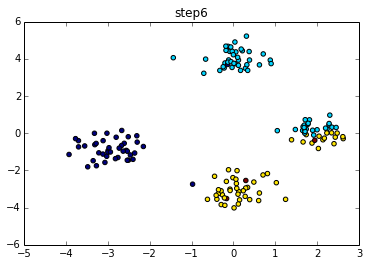

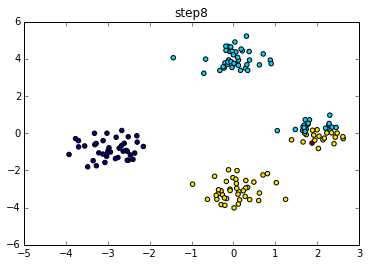

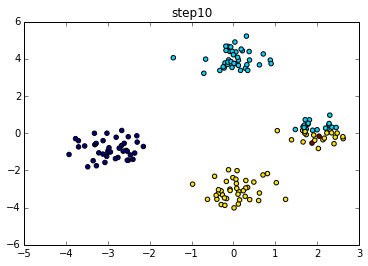

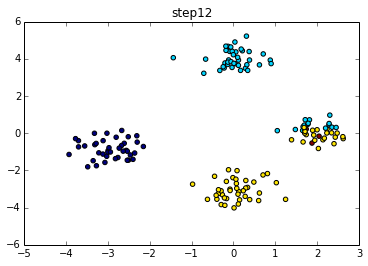

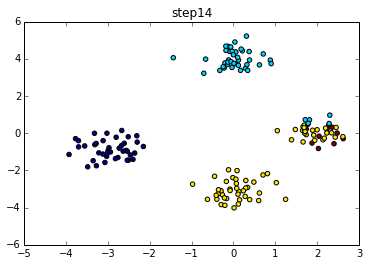

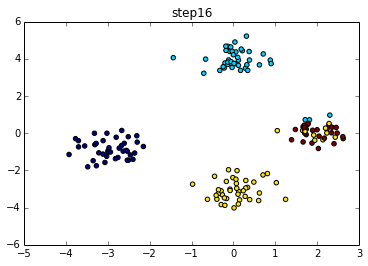

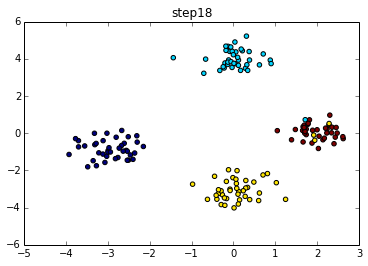

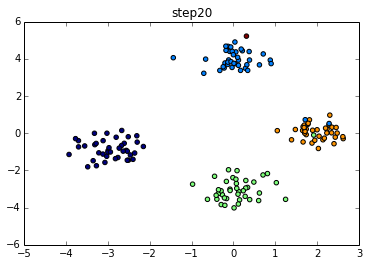

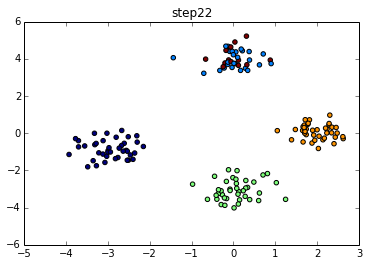

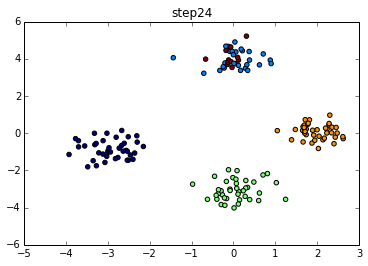

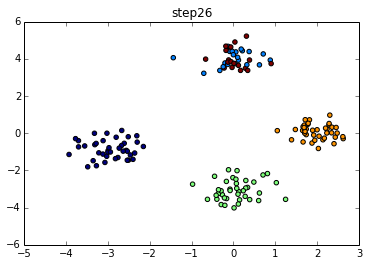

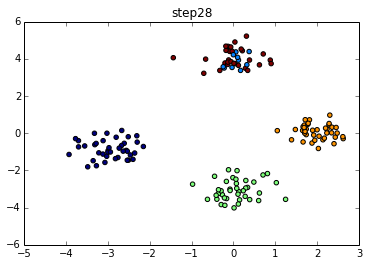

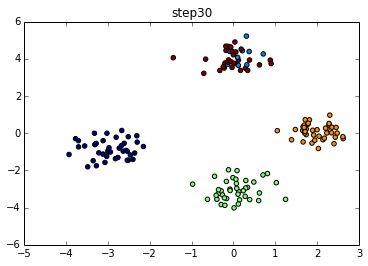

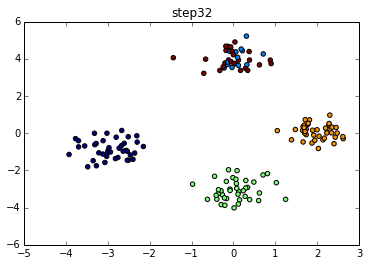

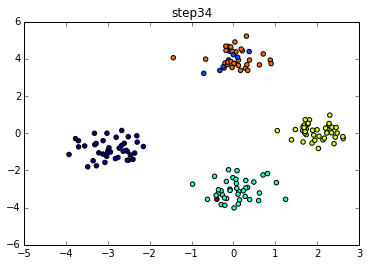

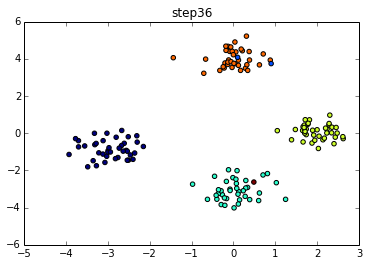

/Library/Python/2.7/site-packages/ipykernel/__main__.py:62: RuntimeWarning: invalid value encountered in divide


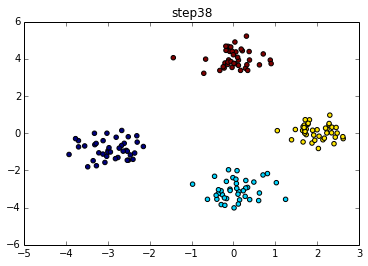

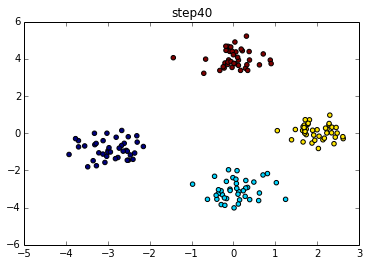

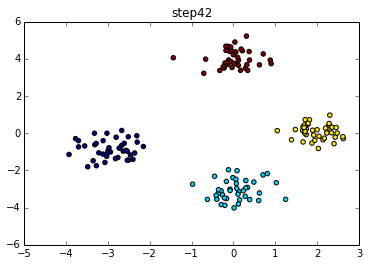

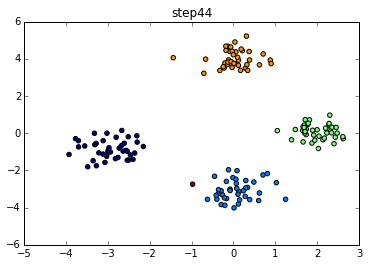

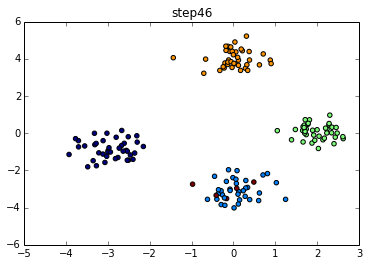

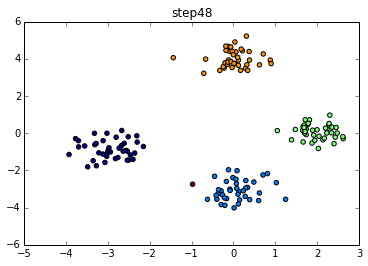

In [10]:

x4 = shuffle(x4) 
repeat_times = 50
RRR= 3
show_step = 2
g0_variance = 4.0
gamma=0.8

c_first = np.random.randint(1,size=len(x4))
mean_first = np.random.normal(0,g0_variance,2).reshape(1,2)

for kkk in range(repeat_times):
    #### draw z
    for jjj in range(RRR):
        for iii in range(len(x4)):
            target = iii
            c_pesdo = np.delete(c_first,target)
            counter = np.bincount(c_pesdo)
            judge_list = alec(counter,gamma)
            judge = np.random.uniform()
            for j in range(len(judge_list)-1):
                if judge_list[j]< judge < judge_list[j+1]:
                    candidate = j
                    if j == len(judge_list)-2:
                        candidate_mean = np.random.normal(0,g0_variance,2)
            old = c_first[target]
            
            ##### calucate the acceptance rate 
            
            if candidate == len(judge_list)-2:
                alpha = sp.stats.multivariate_normal.pdf(x4[target],candidate_mean,conv)*1.0/sp.stats.multivariate_normal.pdf(x4[target],mean_first[old],conv)
            else: 
                alpha = sp.stats.multivariate_normal.pdf(x4[target],mean_first[candidate],conv)*1.0/sp.stats.multivariate_normal.pdf(x4[target],mean_first[old],conv)
            acceptance = np.min([1,alpha])
            judge2 = np.random.uniform()
            
            #### update depending on the acceptance rate
            
            if judge2 < acceptance:
                c_first[target] = candidate
                if candidate == len(judge_list)-2:
                    mean_first = np.append(mean_first,np.reshape(candidate_mean,(1,2)),axis =0)
    counter = np.bincount(c_first)
    
    ##### draw theta 
    lister = np.zeros(len(counter))
    tosum =[]
    mycounter =np.zeros(len(counter))
    for iii in range(len(x4)):
        c_i = c_first[iii]
        lister = np.zeros((len(counter),2))
        counter[c_i] = counter[c_i] + 1
        lister[c_i] = x4[iii]
        tosum.append(lister)
    
    ### calucate the posteior distibution
    
    aux1 = 1.0/(conv[0,0]*conv[0,0])
    aux2 = 1.0/(g0_variance*g0_variance)
    aux3 = aux1/(aux1+aux2)
    
    mean_first = aux3*np.sum(np.array(tosum),axis=0)*1.0/np.array(counter)[:,np.newaxis]
    ### plot
    if (kkk%show_step ==0):
        colorlist = retru_c(c_first)
        plt.scatter(x4[:,0],x4[:,1],c=colorlist)
        plt.title("step"+str(kkk))
        plt.savefig("npbb"+str(kkk)+".png")
        plt.show()